<a href="https://colab.research.google.com/github/atif4/Q2/blob/gh-pages/k_fold_vali_astronauts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#hide earrings 
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np

In [ ]:

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('seaborn')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [ ]:
"""from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense"""
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, SGD

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Dataset/astronauts.csv")
df.head(3)

,Name,Year,Group,Status,Birth Date,Birth Place,Gender,Alma Mater,Undergraduate Major,Graduate Major,Military Rank,Military Branch,Space Flights,Space Flight (hr),Space Walks,Space Walks (hr),Missions,Death Date,Death Mission
0,Joseph M. Acaba,2004.0,19.0,Active,5/17/1967,"Inglewood, CA",Male,University of California-Santa Barbara; Univer...,Geology,Geology,NaN,NaN,2,3307,2,13.0,"STS-119 (Discovery), ISS-31/32 (Soyuz)",NaN,NaN
1,Loren W. Acton,NaN,NaN,Retired,3/7/1936,"Lewiston, MT",Male,Montana State University; University of Colorado,Engineering Physics,Solar Physics,NaN,NaN,1,190,0,0.0,STS 51-F (Challenger),NaN,NaN
2,James C. Adamson,1984.0,10.0,Retired,3/3/1946,"Warsaw, NY",Male,US Military Academy; Princeton University,Engineering,Aerospace Engineering,Colonel,US Army (Retired),2,334,0,0.0,"STS-28 (Columbia), STS-43 (Atlantis)",NaN,NaN


In [ ]:
df.rename(columns={'Birth Date':'Birth_Date', 'Birth Place':'Birth_Place','Alma Mater':'Alma_Mater', 'Undergraduate Major':'Undergraduate_Major', 'Graduate Major':'Graduate_Major',
       'Military Rank':'Military_Rank', 'Military Branch':'Military_Branch', 'Space Flights':'Space_Flights',
       'Space Flight (hr)':'Space_Flight_(hr)', 'Space Walks':'Space_Walks', 'Space Walks (hr)':'Space_Walks_(hr)',
       'Death Date':'Death_Date', 'Death Mission':'Death_Mission'},inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 357 entries, 0 to 356
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Name                 357 non-null    object 
 1   Year                 330 non-null    float64
 2   Group                330 non-null    float64
 3   Status               357 non-null    object 
 4   Birth_Date           357 non-null    object 
 5   Birth_Place          357 non-null    object 
 6   Gender               357 non-null    object 
 7   Alma_Mater           356 non-null    object 
 8   Undergraduate_Major  335 non-null    object 
 9   Graduate_Major       298 non-null    object 
 10  Military_Rank        207 non-null    object 
 11  Military_Branch      211 non-null    object 
 12  Space_Flights        357 non-null    int64  
 13  Space_Flight_(hr)    357 non-null    int64  
 14  Space_Walks          357 non-null    int64  
 15  Space_Walks_(hr)     357 non-null    flo

In [ ]:
df['Death_Date']=df['Death_Date'].astype('datetime64[ns]')
df['Birth_Date']=df['Birth_Date'].astype('datetime64[ns]')

In [ ]:
def get_each_dtpyes(col_list):
    ob = []
    integer = []
    fl = []
    data_time = []
    bol = []
    for i in col_list:
        if df[i].dtypes == 'object':
            ob.append(i)
        if df[i].dtypes == 'int64':
            integer.append(i)
        if  df[i].dtypes == 'float64':
            fl.append(i)
        if df[i].dtypes == 'datetime64[ns]':
            data_time.append(i)
        if df[i].dtypes == "bool":
            bol.append(i)
    return print(f"list of object dtpyes:\n{ob}\n{len(ob)}\n\nlist of integers dtypes:\n{integer}\n{len(integer)}\n\nlist of float dtypes:\n{fl}\n{len(fl)}\n\nlist of datatime dtype:\n{data_time}\n{len(data_time)}\nlist of datatime dtype:\n{bol}\n{len(bol)}\n")
get_each_dtpyes(['Name', 'Year', 'Group', 'Status', 'Birth_Date', 'Birth_Place','Gender', 'Alma_Mater', 'Undergraduate_Major', 'Graduate_Major',
       'Military_Rank', 'Military_Branch', 'Space_Flights','Space_Flight_(hr)', 'Space_Walks', 'Space_Walks_(hr)', 'Missions','Death_Date', 'Death_Mission'])

list of object dtpyes:
['Name', 'Status', 'Birth_Place', 'Gender', 'Alma_Mater', 'Undergraduate_Major', 'Graduate_Major', 'Military_Rank', 'Military_Branch', 'Missions', 'Death_Mission']
11

list of integers dtypes:
['Space_Flights', 'Space_Flight_(hr)', 'Space_Walks']
3

list of float dtypes:
['Year', 'Group', 'Space_Walks_(hr)']
3

list of datatime dtype:
['Birth_Date', 'Death_Date']
2
list of datatime dtype:
[]
0



In [ ]:
null_value = {}
not_null_value = {}
def get_null_value_col(list_col):
  for i in list_col:
    if df[i].isnull().sum() == 0:
      not_null_value[i]=df[i].isnull().sum()
    else:
      null_value[i]=df[i].isnull().sum()
get_null_value_col(['Name', 'Year', 'Group', 'Status', 'Birth_Date', 'Birth_Place', 'Gender', 'Alma_Mater', 'Undergraduate_Major', 'Graduate_Major',
       'Military_Rank', 'Military_Branch', 'Space_Flights','Space_Flight_(hr)', 'Space_Walks', 'Space_Walks_(hr)', 'Missions', 'Death_Date', 'Death_Mission'])

In [ ]:
display("This is list of columns which has null values: ",null_value)
display("The number of columns which has null value are  ",len(null_value))
#display("This is list of columns which does not have null values: ",not_null_value)
#display("This is lenght of list which does not have null value: ",len(not_null_value))

'This is list of columns which has null values: '

{'Year': 27,
 'Group': 27,
 'Alma_Mater': 1,
 'Undergraduate_Major': 22,
 'Graduate_Major': 59,
 'Military_Rank': 150,
 'Military_Branch': 146,
 'Missions': 23,
 'Death_Date': 305,
 'Death_Mission': 341}

'The number of columns which has null value are  '

10

In [ ]:
null_value.keys()

dict_keys(['Year', 'Group', 'Alma_Mater', 'Undergraduate_Major', 'Graduate_Major', 'Military_Rank', 'Military_Branch', 'Missions', 'Death_Date', 'Death_Mission'])

In [ ]:
update_col_dic={}
drop_col_dic ={}
def get_percentage_of_each_col(list_col):
  for i in list_col:
    if df[i].isnull().sum()/len(df)*100 > 30:
      update_col_dic[i] = df[i].isnull().sum()/len(df)*100
    else:
      drop_col_dic[i]=df[i].isnull().sum()/len(df)*100 
get_percentage_of_each_col(['Year', 'Group', 'Alma_Mater', 'Undergraduate_Major', 'Graduate_Major', 'Military_Rank', 'Military_Branch', 'Missions', 'Death_Date', 'Death_Mission'])

In [ ]:
display("These percentages are greater then 30 you have to use techniques to fill the missing values of following columns: ", update_col_dic)

'These percentages are greater then 30 you have to use techniques to fill the missing values of following columns: '

{'Military_Rank': 42.016806722689076,
 'Military_Branch': 40.896358543417364,
 'Death_Date': 85.43417366946778,
 'Death_Mission': 95.51820728291317}

In [ ]:
display("These percentages are not greater then 30 you have to drop the following columns: ",drop_col_dic)

'These percentages are not greater then 30 you have to drop the following columns: '

{'Year': 7.563025210084033,
 'Group': 7.563025210084033,
 'Alma_Mater': 0.2801120448179272,
 'Undergraduate_Major': 6.162464985994398,
 'Graduate_Major': 16.5266106442577,
 'Missions': 6.442577030812324}

In [ ]:
drop_col_dic.keys()

dict_keys(['Year', 'Group', 'Alma_Mater', 'Undergraduate_Major', 'Graduate_Major', 'Missions'])

In [ ]:
df.drop(['Year', 'Group', 'Alma_Mater', 'Undergraduate_Major', 'Graduate_Major', 'Missions'],axis=1,inplace=True)

In [ ]:
df.head(2)

,Name,Status,Birth_Date,Birth_Place,Gender,Military_Rank,Military_Branch,Space_Flights,Space_Flight_(hr),Space_Walks,Space_Walks_(hr),Death_Date,Death_Mission
0,Joseph M. Acaba,Active,1967-05-17,"Inglewood, CA",Male,NaN,NaN,2,3307,2,13.0,NaT,NaN
1,Loren W. Acton,Retired,1936-03-07,"Lewiston, MT",Male,NaN,NaN,1,190,0,0.0,NaT,NaN


In [ ]:
update_col_dic.keys()

dict_keys(['Military_Rank', 'Military_Branch', 'Death_Date', 'Death_Mission'])

In [ ]:
dict_of_mode_values = {}
def get_mode_value_to_fill_na_values(col_list):
    for i in col_list:
        dict_of_mode_values[i] = df[i].mode()
get_mode_value_to_fill_na_values(['Military_Rank', 'Military_Branch', 'Death_Date', 'Death_Mission'])

In [ ]:
dict_of_mode_values

{'Military_Rank': 0    Colonel
 dtype: object, 'Military_Branch': 0    US Air Force (Retired)
 dtype: object, 'Death_Date': 0   1986-01-28
 dtype: datetime64[ns], 'Death_Mission': 0    STS 51-L (Challenger)
 dtype: object}

In [ ]:
df["Military_Rank"].fillna("Colonel", inplace = True)
df["Death_Mission"].fillna("STS 51-L (Challenger)", inplace = True)
df["Military_Branch"].fillna("US Air Force (Retired)", inplace = True)
df["Death_Date"].fillna("1986-01-28", inplace=True)

In [ ]:
"""def get_fill(list_of_col_id):
  for i in list_of_col_id:
    df[i].fillna(df[i].mode(), inplace = True)"""

'def get_fill(list_of_col_id):\n  for i in list_of_col_id:\n    df[i].fillna(df[i].mode(), inplace = True)'

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 357 entries, 0 to 356
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Name               357 non-null    object        
 1   Status             357 non-null    object        
 2   Birth_Date         357 non-null    datetime64[ns]
 3   Birth_Place        357 non-null    object        
 4   Gender             357 non-null    object        
 5   Military_Rank      357 non-null    object        
 6   Military_Branch    357 non-null    object        
 7   Space_Flights      357 non-null    int64         
 8   Space_Flight_(hr)  357 non-null    int64         
 9   Space_Walks        357 non-null    int64         
 10  Space_Walks_(hr)   357 non-null    float64       
 11  Death_Date         357 non-null    datetime64[ns]
 12  Death_Mission      357 non-null    object        
dtypes: datetime64[ns](2), float64(1), int64(3), object(7)
memory usag

In [ ]:
df.head()

,Name,Status,Birth_Date,Birth_Place,Gender,Military_Rank,Military_Branch,Space_Flights,Space_Flight_(hr),Space_Walks,Space_Walks_(hr),Death_Date,Death_Mission
0,Joseph M. Acaba,Active,1967-05-17,"Inglewood, CA",Male,Colonel,US Air Force (Retired),2,3307,2,13.0,1986-01-28,STS 51-L (Challenger)
1,Loren W. Acton,Retired,1936-03-07,"Lewiston, MT",Male,Colonel,US Air Force (Retired),1,190,0,0.0,1986-01-28,STS 51-L (Challenger)
2,James C. Adamson,Retired,1946-03-03,"Warsaw, NY",Male,Colonel,US Army (Retired),2,334,0,0.0,1986-01-28,STS 51-L (Challenger)
3,Thomas D. Akers,Retired,1951-05-20,"St. Louis, MO",Male,Colonel,US Air Force (Retired),4,814,4,29.0,1986-01-28,STS 51-L (Challenger)
4,Buzz Aldrin,Retired,1930-01-20,"Montclair, NJ",Male,Colonel,US Air Force (Retired),2,289,2,8.0,1986-01-28,STS 51-L (Challenger)


In [ ]:
display(df.Military_Rank.unique())
display(len(df.Military_Rank.unique()))

array(['Colonel', 'Lieutenant Colonel', 'Captain', 'Major General',
       'Commander', 'Lieutenant Commander', 'Brigadier General', 'Major',
       'Lieutenant General', 'Chief Warrant Officer', 'Rear Admiral',
       'Vice Admiral'], dtype=object)

12

In [ ]:
df.to_csv('/content/drive/MyDrive/Dataset/astronauts_ready_for_viz.csv', index=False)

In [ ]:
def get_labed_encoder(col_ids_list):
    for col_id_list in col_ids_list:
        df[col_id_list] = df[col_id_list].apply(LabelEncoder().fit_transform)
get_labed_encoder([['Name', 'Status', 'Birth_Place', 'Gender', 'Military_Rank', 'Military_Branch', 'Death_Mission']])
df.head(3)

,Name,Status,Birth_Date,Birth_Place,Gender,Military_Rank,Military_Branch,Space_Flights,Space_Flight_(hr),Space_Walks,Space_Walks_(hr),Death_Date,Death_Mission
0,167,0,1967-05-17,115,1,3,1,2,3307,2,13.0,1986-01-28,1
1,203,3,1936-03-07,135,1,3,1,1,190,0,0.0,1986-01-28,1
2,127,3,1946-03-03,259,1,3,5,2,334,0,0.0,1986-01-28,1


In [ ]:
#df.drop(],axis=1)
df.drop(["Birth_Date","Death_Date"],axis=1,inplace=True)

In [ ]:
df

,Name,Status,Birth_Place,Gender,Military_Rank,Military_Branch,Space_Flights,Space_Flight_(hr),Space_Walks,Space_Walks_(hr),Death_Mission
0,167,0,115,1,3,1,2,3307,2,13.0,1
1,203,3,135,1,3,1,1,190,0,0.0,1
2,127,3,259,1,3,5,2,334,0,0.0,1
3,329,3,241,1,3,1,4,814,4,29.0,1
4,23,3,165,1,3,1,2,289,2,8.0,1
...,...,...,...,...,...,...,...,...,...,...,...
352,54,3,114,1,3,1,3,4044,7,41.0,1
353,238,3,48,1,4,12,0,0,0,0.0,1
354,4,3,116,1,3,1,1,295,1,0.5,1
355,163,3,224,1,1,13,6,835,3,20.0,1


In [ ]:
def get_seprate_features(df_id,col_id):
    #col_id is special col or target col b/c this the whole model is going to be created 
    global X, y
    X = df_id.drop(col_id,axis = 1) 
    y = df_id[col_id]
get_seprate_features(df,['Military_Rank'])

In [ ]:
X

,Name,Status,Birth_Place,Gender,Military_Branch,Space_Flights,Space_Flight_(hr),Space_Walks,Space_Walks_(hr),Death_Mission
0,167,0,115,1,1,2,3307,2,13.0,1
1,203,3,135,1,1,1,190,0,0.0,1
2,127,3,259,1,5,2,334,0,0.0,1
3,329,3,241,1,1,4,814,4,29.0,1
4,23,3,165,1,1,2,289,2,8.0,1
...,...,...,...,...,...,...,...,...,...,...
352,54,3,114,1,1,3,4044,7,41.0,1
353,238,3,48,1,12,0,0,0,0.0,1
354,4,3,116,1,1,1,295,1,0.5,1
355,163,3,224,1,13,6,835,3,20.0,1


In [ ]:
y = df.Military_Rank
y = pd.get_dummies(y)
y.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,0,0,0,1,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0,0


In [ ]:
y.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,0,0,0,1,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0,0


In [ ]:
def get_train_test_split(array1, array2, test_size, random_state):
    global X_train, X_test, y_train, y_test
    X_train, X_test, y_train, y_test = train_test_split(array1, array2, test_size=test_size,random_state=random_state)
get_train_test_split(X,y,0.3,0)

In [ ]:
# when you are plaNing to use k-fold validation so it better to made a custom method\function for network b/c we have to use 
# the network in k-fold validation section.
def build_model():
    model = Sequential()
    model.add(Dense(10, activation='relu',input_shape=(X_train.shape[1],)))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(6, activation='relu'))
    model.add(Dense(12, activation='softmax'))
    #print(model.summary())
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    # we use loss='mse'(mean square error) always use in regression problems. it is loss function 
    # in regression we do not measure the accuracy, we mearure the mae(mean absolute error) 
    return model

In [ ]:
build_model().summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                110       
                                                                 
 dense_1 (Dense)             (None, 8)                 88        
                                                                 
 dense_2 (Dense)             (None, 6)                 54        
                                                                 
 dense_3 (Dense)             (None, 12)                84        
                                                                 
Total params: 336
Trainable params: 336
Non-trainable params: 0
_________________________________________________________________


In [ ]:
357//4
89+89
178+89
267+89

356

In [ ]:
# here it follow the same policy of k-for validation such as 
# here we made 4 groups every time singal behave like test_data and other train_data and keep the acc: in list and 
# it keeps doing untill it get all 4 acccuray 
k=4
num_val_samples = len(X_train) // k # 357//4 --> 101 the // sign avido the point such as 101.0 it is flod division 
# it will have 4 fold mean 357 is going divide into 4 range 
num_epochs = 100
all_acc_histories = []
for i in range(k):
    print('processing fold #', i)
    # i = 1
    val_data = X_train[i * num_val_samples: (i + 1) * num_val_samples]   
    val_targets = y_train[i * num_val_samples: (i + 1) * num_val_samples] 
    partial_train_data = np.concatenate([X_train[:i * num_val_samples], X_train[(i + 1) * num_val_samples:]], axis=0)
    partial_train_targets = np.concatenate([y_train[:i * num_val_samples], y_train[(i + 1) * num_val_samples:]], axis=0)
    model = build_model() 
    history = model.fit(partial_train_data, partial_train_targets, validation_data=(val_data, val_targets), epochs=num_epochs, batch_size=1, verbose=0)
    acc_history = history.history['val_accuracy']
    all_acc_histories.append(acc_history)

processing fold # 0


processing fold # 1
processing fold # 2
processing fold # 3


In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
average_acc_history = [np.mean([x[i] for x in all_acc_histories]) for i in range(num_epochs)]
print(len(average_acc_history))
average_acc_history 

100


[0.10483870655298233,
 0.4717741906642914,
 0.6008064448833466,
 0.6048387289047241,
 0.6733870953321457,
 0.6733870953321457,
 0.661290317773819,
 0.6048386991024017,
 0.6451612859964371,
 0.6774193495512009,
 0.6693548262119293,
 0.6854838579893112,
 0.6451612710952759,
 0.6935483813285828,
 0.7096774131059647,
 0.6653225719928741,
 0.6572580486536026,
 0.6733870804309845,
 0.6653225719928741,
 0.6774193346500397,
 0.6895161122083664,
 0.681451603770256,
 0.6774193495512009,
 0.6895161271095276,
 0.6693548262119293,
 0.6774193346500397,
 0.681451603770256,
 0.6975806355476379,
 0.6774193495512009,
 0.681451603770256,
 0.6895161122083664,
 0.6653225719928741,
 0.681451603770256,
 0.6975806355476379,
 0.6532258093357086,
 0.6693548411130905,
 0.7016129046678543,
 0.7096774131059647,
 0.681451603770256,
 0.6653225719928741,
 0.6854838728904724,
 0.6854838579893112,
 0.6733870953321457,
 0.7056451439857483,
 0.7096774131059647,
 0.7137096673250198,
 0.6975806355476379,
 0.665322571992874

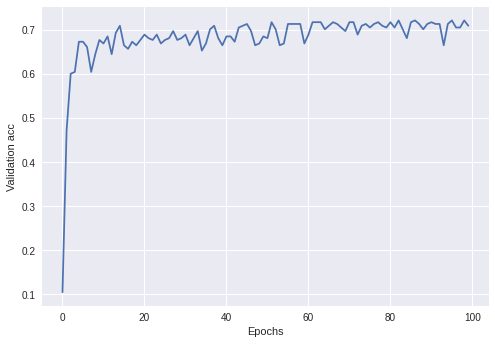

In [ ]:
plt.plot(average_acc_history)
plt.xlabel('Epochs')
plt.ylabel('Validation acc')
plt.show()

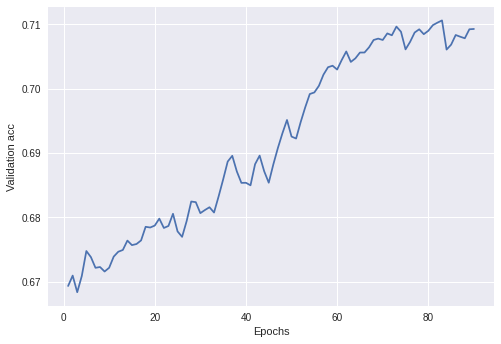

In [ ]:
def smooth_curve(points, factor=0.9): # 0.9 is the default value 
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points
    
smooth_acc_history = smooth_curve(average_acc_history[10:])
plt.plot(range(1, len(smooth_acc_history) + 1), smooth_acc_history)
plt.xlabel('Epochs')
plt.ylabel('Validation acc')
plt.show()
# it say that your epoch are fine upto 95 then it might be possible change would observe in loss 

In [ ]:
model = build_model()
model.fit(X_train, y_train, epochs=5, batch_size=16, verbose=0)
#epochs=80 the problem of overfitting is finished b/c we get the idea what are right epochs 
train_loss, train_acc= model.evaluate(X_train, y_train)
print('train accuracy:', train_acc*100)
print('train loss:', train_loss*100)

8/8 [==============================] - 0s 2ms/step - loss: 20.6371 - accuracy: 0.0040
train accuracy: 0.40160641074180603
train loss: 2063.713264465332
